In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.extend(['../', '../../'])
from cb_model import ConvertibleBondPricer
from TW_cb_backtest import TaiwanCBStrategy


In [2]:
# 讀取CB資料
path_cb_81102 = r'C:\Users\User\Desktop\CB-pricing\CB data\cb_81102_test.csv'
cb_df_81102 = pd.read_csv(path_cb_81102)
cb_df_81102


,Unnamed: 0,公司代碼,簡稱,年月,最近一期轉換價格日,最近一期配股基準日,首次發行(Y/N),發行總額(1000),到目前餘額(1000),轉換價格,...,賣回價%(五),賣回收益率五,賣回日起(六),賣回日迄(六),賣回價%(六),賣回收益率六,賣回日起(七),賣回日迄(七),賣回價%(七),賣回收益率七
0,95148,81102,華東二,201804,20180319,2018/03/19,N,600000,600000,14.9,...,-,-,,,-,-,,,-,-
1,95149,81102,華東二,201805,20180319,2018/03/19,N,600000,600000,14.9,...,-,-,,,-,-,,,-,-
2,95150,81102,華東二,201806,20180319,2018/03/19,N,600000,600000,14.9,...,-,-,,,-,-,,,-,-
3,95151,81102,華東二,201807,20180319,2018/03/19,N,600000,600000,14.9,...,-,-,,,-,-,,,-,-
4,95152,81102,華東二,201808,20180804,2018/08/04,N,600000,600000,14.0,...,-,-,,,-,-,,,-,-
5,95153,81102,華東二,201809,20180804,2018/08/04,N,600000,600000,14.0,...,-,-,,,-,-,,,-,-
6,95154,81102,華東二,201810,20180804,2018/08/04,N,600000,600000,14.0,...,-,-,,,-,-,,,-,-
7,95155,81102,華東二,201811,20180804,2018/08/04,N,600000,600000,14.0,...,-,-,,,-,-,,,-,-
8,95156,81102,華東二,201812,20180804,2018/08/04,N,600000,600000,14.0,...,-,-,,,-,-,,,-,-
9,95157,81102,華東二,201901,20180804,2018/08/04,N,600000,600000,14.0,...,-,-,,,-,-,,,-,-


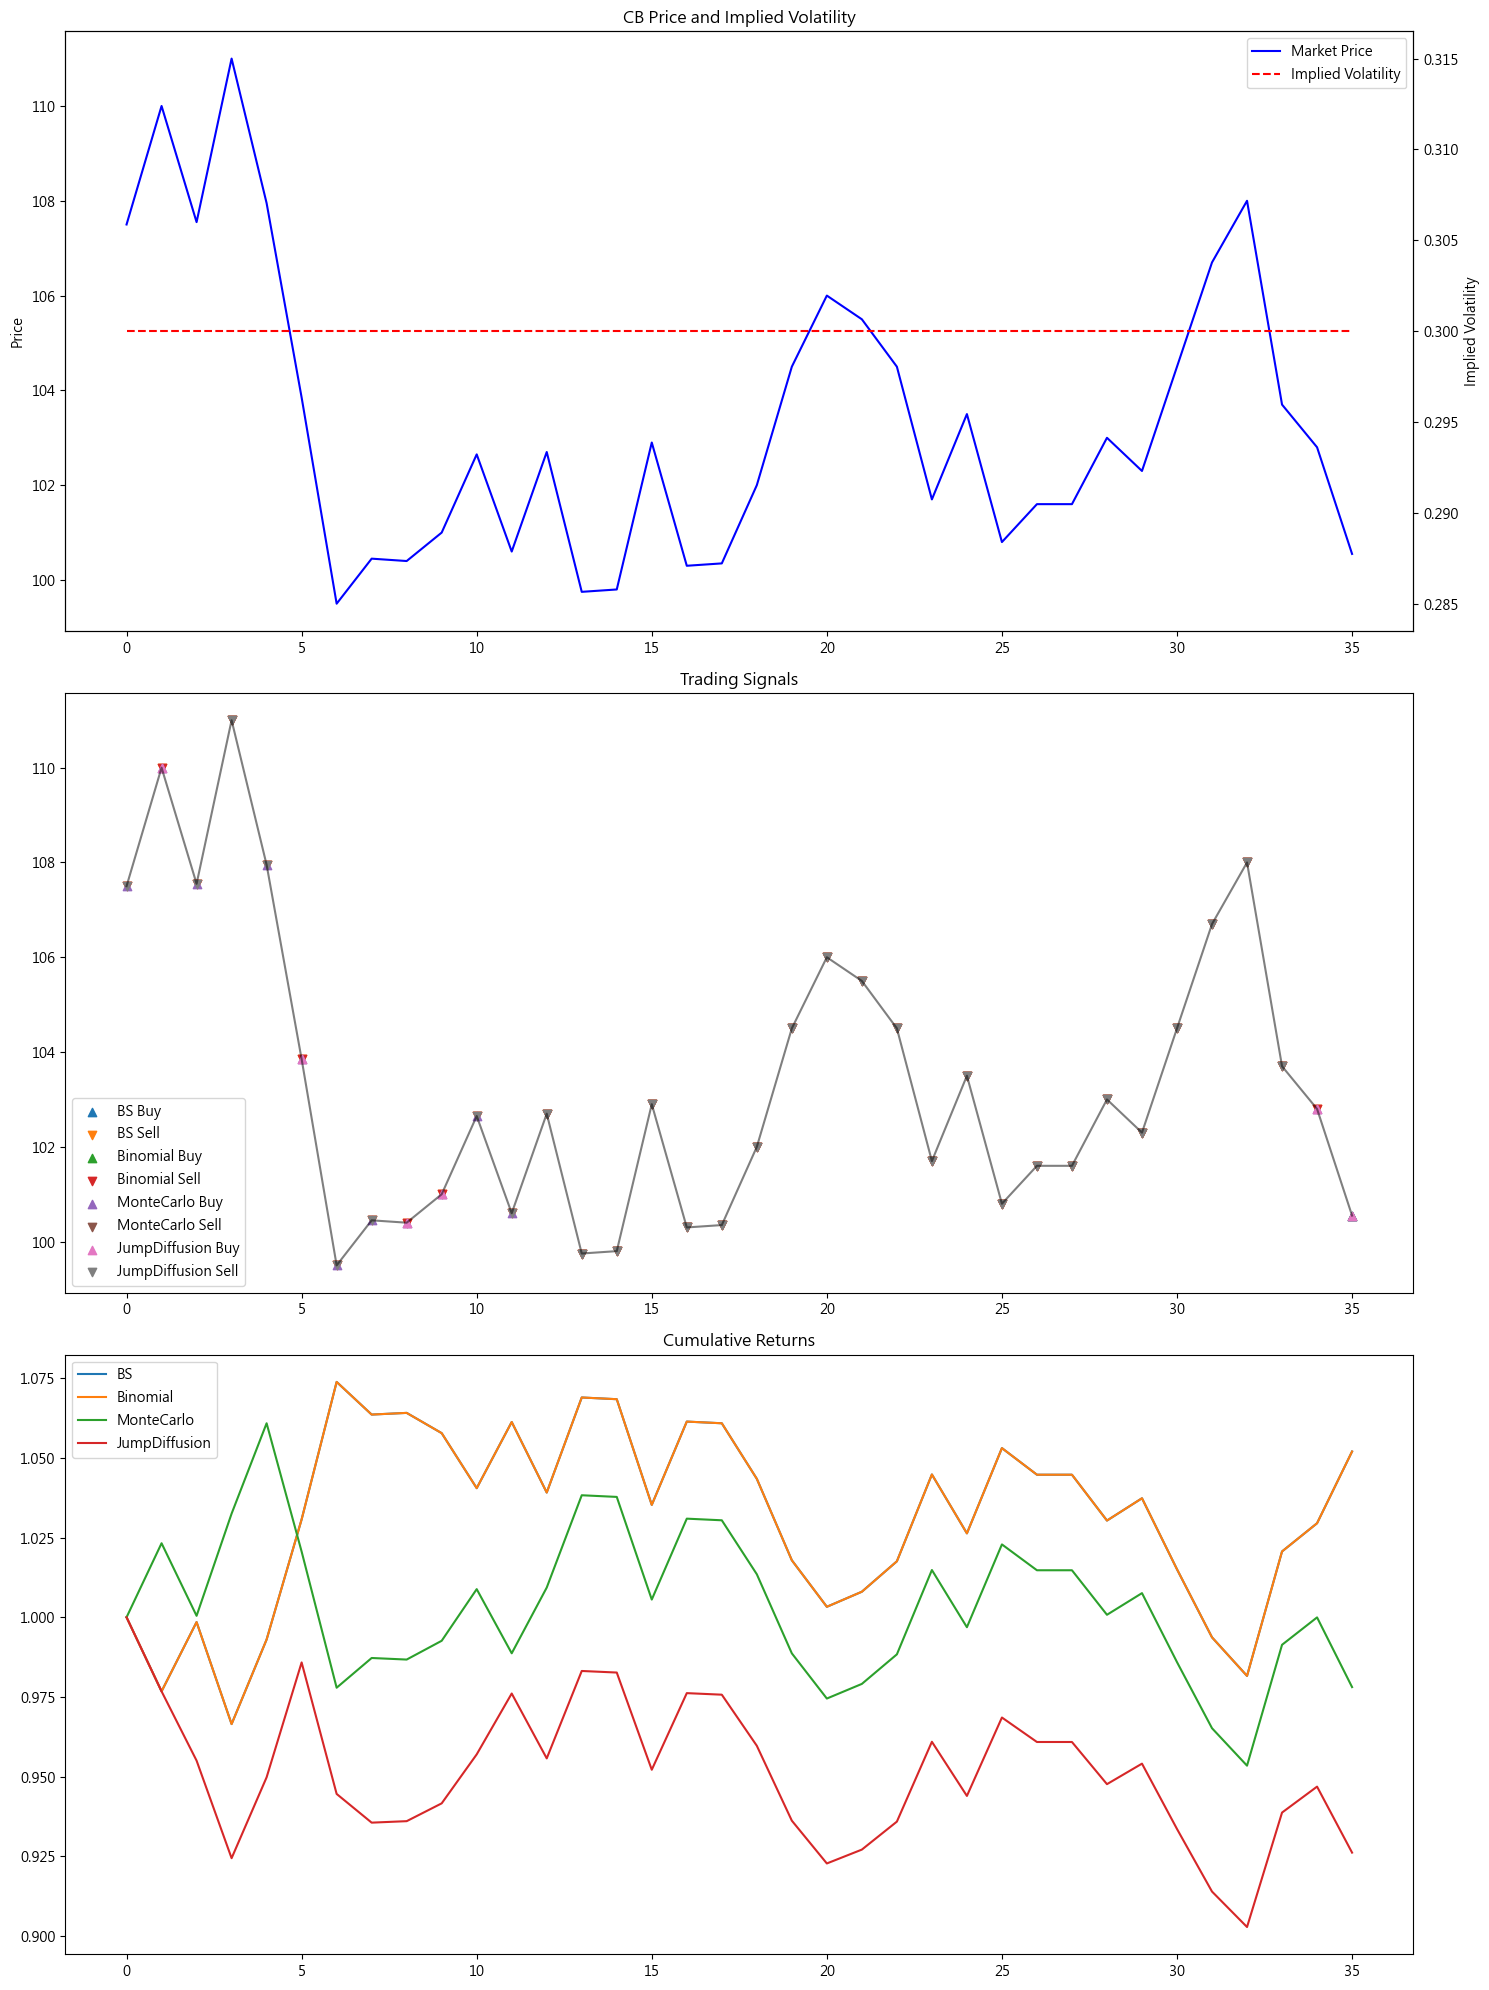


策略績效指標：
                       BS  Binomial  MonteCarlo  JumpDiffusion
Sharpe Ratio       1.2124    1.2124     -0.2906        -1.4203
Max Drawdown       0.0860    0.0860      0.1013         0.0973
Win Rate           0.4444    0.4444      0.4444         0.4167
Avg Return         0.4112    0.4112     -0.0988        -0.4811
Trading Frequency  1.0000    1.0000      1.0000         1.0000

最新交易訊號：
BS模型:
  理論價格: 104.07
  偏離程度: 3.52
  交易信號: 買入
Binomial模型:
  理論價格: 104.07
  偏離程度: 3.52
  交易信號: 買入
MonteCarlo模型:
  理論價格: 105.18
  偏離程度: 4.63
  交易信號: 買入
JumpDiffusion模型:
  理論價格: 105.40
  偏離程度: 4.85
  交易信號: 買入


In [3]:
# 1. 建立策略實例
strategy = TaiwanCBStrategy()
    
# 2. 準備測試資料 (假設從CSV檔案讀取)
# CSV檔案需包含以下欄位：
# 年月, 轉換標的-收盤價, CB-收盤價, 轉換價格, 轉換價值 (1000), 
# CB-市值溢價%, 到期日, 是否擔保(Y/N)

    
# 3. 處理資料
analysis_data = strategy.prepare_data(cb_df_81102)
    
# 4. 執行策略評估
model_results = strategy.evaluate_pricing_models(analysis_data)
    
# 5. 繪製結果圖表
strategy.plot_results(analysis_data, model_results)
    
# 6. 計算並顯示績效指標
performance_metrics = strategy.calculate_performance_metrics(model_results)
print("\n策略績效指標：")
print(performance_metrics)
    
# 7. 取得詳細的交易訊號
trading_opportunities, model_prices, trading_signals = model_results
    
# 顯示最新的交易訊號
latest_signals = trading_signals.iloc[-1]
print("\n最新交易訊號：")
for model in ['BS', 'Binomial', 'MonteCarlo', 'JumpDiffusion']:
    signal = latest_signals[f'{model}_Signal']
    price = latest_signals[f'{model}_Price']
    mispricing = latest_signals[f'{model}_Mispricing']
    print(f"{model}模型:")
    print(f"  理論價格: {price:.2f}")
    print(f"  偏離程度: {mispricing:.2f}")
    print(f"  交易信號: {'買入' if signal == 1 else '賣出' if signal == -1 else '持平'}")

In [4]:
model_prices

,BS,Binomial,MonteCarlo,JumpDiffusion
0,87.919463,87.919463,107.552402,103.958711
1,98.993289,98.993289,113.547479,110.261817
2,93.288591,93.288591,110.165823,105.248055
3,92.281879,92.281879,109.597172,106.158905
4,95.357143,95.357143,111.267795,106.050849
5,88.214286,88.214286,106.660231,105.312806
6,73.571429,73.571429,100.325701,97.597566
7,76.428571,76.428571,101.783602,99.667409
8,77.142857,77.142857,101.308854,100.523737
9,79.642857,79.642857,102.934236,101.817945


In [5]:
trading_signals

,Market_Price,BS_Price,BS_Mispricing,BS_Signal,Binomial_Price,Binomial_Mispricing,Binomial_Signal,MonteCarlo_Price,MonteCarlo_Mispricing,MonteCarlo_Signal,JumpDiffusion_Price,JumpDiffusion_Mispricing,JumpDiffusion_Signal
0,107.50,87.919463,-19.580537,-1,87.919463,-19.580537,-1,107.552402,0.052402,1,103.958711,-3.541289,-1
1,110.00,98.993289,-11.006711,-1,98.993289,-11.006711,-1,113.547479,3.547479,1,110.261817,0.261817,1
2,107.55,93.288591,-14.261409,-1,93.288591,-14.261409,-1,110.165823,2.615823,1,105.248055,-2.301945,-1
3,111.00,92.281879,-18.718121,-1,92.281879,-18.718121,-1,109.597172,-1.402828,-1,106.158905,-4.841095,-1
4,107.95,95.357143,-12.592857,-1,95.357143,-12.592857,-1,111.267795,3.317795,1,106.050849,-1.899151,-1
5,103.85,88.214286,-15.635714,-1,88.214286,-15.635714,-1,106.660231,2.810231,1,105.312806,1.462806,1
6,99.50,73.571429,-25.928571,-1,73.571429,-25.928571,-1,100.325701,0.825701,1,97.597566,-1.902434,-1
7,100.45,76.428571,-24.021429,-1,76.428571,-24.021429,-1,101.783602,1.333602,1,99.667409,-0.782591,-1
8,100.40,77.142857,-23.257143,-1,77.142857,-23.257143,-1,101.308854,0.908854,1,100.523737,0.123737,1
9,101.00,79.642857,-21.357143,-1,79.642857,-21.357143,-1,102.934236,1.934236,1,101.817945,0.817945,1


In [6]:
analysis_data

,date,stock_price,cb_price,conversion_price,conversion_value,market_premium,remaining_years,is_guaranteed,implied_vol
0,2018-04-01,13.10,107.50,14.9,87.9195,-18.21,2.967123,0,0.3
1,2018-05-01,14.75,110.00,14.9,98.9933,-10.01,2.884932,0,0.3
2,2018-06-01,13.90,107.55,14.9,93.2886,-13.26,2.800000,0,0.3
3,2018-07-01,13.75,111.00,14.9,92.2819,-16.86,2.717808,0,0.3
4,2018-08-01,13.35,107.95,14.0,95.3571,-11.67,2.632877,0,0.3
5,2018-09-01,12.35,103.85,14.0,88.2143,-15.06,2.547945,0,0.3
6,2018-10-01,10.30,99.50,14.0,73.5714,-26.06,2.465753,0,0.3
7,2018-11-01,10.70,100.45,14.0,76.4286,-23.91,2.380822,0,0.3
8,2018-12-01,10.80,100.40,14.0,77.1429,-23.16,2.298630,0,0.3
9,2019-01-01,11.15,101.00,14.0,79.6429,-21.15,2.213699,0,0.3


In [7]:
#cb_df_26107.iloc[:, 2:30].drop(['發行總額(1000)', '到目前餘額(1000)', '上市日', '幣別', '轉換價格說明', '發行時匯率', '發行年數', '首次發行(Y/N)', '轉換標的', '票面利率 %', '付息次數'], axis=1).head(10)

In [8]:
test = ConvertibleBondPricer(
    S=26,
    K=100,
    T=4.5,
    r=0.015,  # 固定無風險利率1.5%
    sigma=0.3,  # 使用固定波動率30%
    conversion_ratio=100000 /19,
    credit_spread=0.02,  # 固定信用利差2%
    trigger_price=19*1.3  # 轉換價格130%為強制贖回價
                
)

In [9]:
trading_opportunities

,BS_signal,BS_returns,BS_cumulative_returns,Binomial_signal,Binomial_returns,Binomial_cumulative_returns,MonteCarlo_signal,MonteCarlo_returns,MonteCarlo_cumulative_returns,JumpDiffusion_signal,JumpDiffusion_returns,JumpDiffusion_cumulative_returns
0,-1,0.000000,1.000000,-1,0.000000,1.000000,1,0.000000,1.000000,-1,0.000000,1.000000
1,-1,-0.023256,0.976744,-1,-0.023256,0.976744,1,0.023256,1.023256,1,-0.023256,0.976744
2,-1,0.022273,0.998499,-1,0.022273,0.998499,1,-0.022273,1.000465,-1,-0.022273,0.954989
3,-1,-0.032078,0.966469,-1,-0.032078,0.966469,-1,0.032078,1.032558,-1,-0.032078,0.924355
4,-1,0.027477,0.993025,-1,0.027477,0.993025,1,0.027477,1.060930,-1,0.027477,0.949754
5,-1,0.037981,1.030741,-1,0.037981,1.030741,1,-0.037981,1.020636,1,0.037981,0.985826
6,-1,0.041887,1.073916,-1,0.041887,1.073916,1,-0.041887,0.977884,-1,-0.041887,0.944533
7,-1,-0.009548,1.063662,-1,-0.009548,1.063662,1,0.009548,0.987220,-1,-0.009548,0.935515
8,-1,0.000498,1.064192,-1,0.000498,1.064192,1,-0.000498,0.986729,1,0.000498,0.935980
9,-1,-0.005976,1.057832,-1,-0.005976,1.057832,1,0.005976,0.992626,1,0.005976,0.941574
